# Predict whether a mammogram is bening or malignant
This is a dataset from the UCI repository (source: https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass). It was also used as a final project on Frank Kane of Sundog udemy course https://www.udemy.com/data-science-and-machine-learning-with-python-hands-on/. This is my own implementation with some additions from my own personal research. I added some visulization for better understanding.
   1. BI-RADS assessment: 1 to 5 (ordinal)  
   2. Age: patient's age in years (integer)
   3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
   4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
   5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
   6. Severity: benign=0 or malignant=1 (binominal)

First we import the csv files using pandas dataframe and we will view its first 5 entry with .head().
For enthusiasts who want more information about the pandas dataframe can be found at https://pandas.pydata.org/ and https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html for pandas read_csv

In [183]:
import pandas as pd

df = pd.read_csv("mammographic_masses.data.txt")

df.head()

,5,67,3,5.1,3.1,1
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0


In [184]:
header = ["BI_RADS", "age", "shape", "margin", "density", "severity"]

df = pd.read_csv("mammographic_masses.data.txt", names = header, usecols = range(6), na_values = '?')

df.head()

,BI_RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [185]:
df.describe()

,BI_RADS,age,shape,margin,density,severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [186]:
df.loc[df['BI_RADS'][df['BI_RADS'] > 5]]

,BI_RADS,age,shape,margin,density,severity
55,4.0,43.0,3.0,4.0,NaN,0
6,4.0,70.0,NaN,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0


In [187]:
df['BI_RADS'][df['BI_RADS'] > 5] = np.nan
df.loc[(df['density'].isnull()) | 
       (df['age'].isnull()) |
      (df['shape'].isnull()) |
       (df['margin'].isnull()) |
      df['BI_RADS'].isnull()]


C:\Users\JOSEPHINE\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,BI_RADS,age,shape,margin,density,severity
1,4.0,43.0,1.0,1.0,NaN,1
4,5.0,74.0,1.0,5.0,NaN,1
5,4.0,65.0,1.0,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
7,5.0,42.0,1.0,NaN,3.0,0
9,5.0,60.0,NaN,5.0,1.0,1
12,4.0,64.0,1.0,NaN,3.0,0
19,4.0,40.0,1.0,NaN,NaN,0
20,NaN,66.0,NaN,NaN,1.0,1
22,4.0,43.0,1.0,NaN,NaN,0


In [188]:
#we can easily calculate the median and find nan using numpy
import numpy as np

age_mean = np.mean(df['age'])
age_nan = np.isnan(df['age'])
df['age'][age_nan] = age_mean

C:\Users\JOSEPHINE\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
BI_RADS     947 non-null float64
age         961 non-null float64
shape       930 non-null float64
margin      913 non-null float64
density     885 non-null float64
severity    961 non-null int64
dtypes: float64(5), int64(1)
memory usage: 45.1 KB


In [190]:
df.dropna(inplace = True)

In [191]:
#so lets check and see if all is well
df.describe()

,BI_RADS,age,shape,margin,density,severity
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,4.317576,55.737500,2.781818,2.814545,2.916364,0.484848
std,0.669004,14.639456,1.242808,1.567504,0.350501,0.500074
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,5.000000,96.000000,4.000000,5.000000,4.000000,1.000000


So we can easily find the correlation of the datas with each other using heatmap. We will do that importing seaborn and matplotlib.pyplot.
Enthusiastsss you can read about both in this links respectively.
https://matplotlib.org/api/pyplot_api.html
https://seaborn.pydata.org/generated/seaborn.heatmap.html

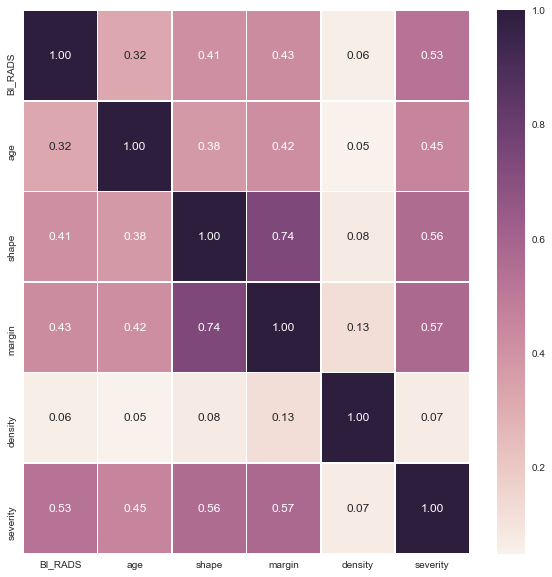

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.show()

In [193]:
labels = df['severity'].values

features = df[['BI_RADS', 'age', 'shape', 'margin', 'density']].values

features

array([[ 5., 67.,  3.,  5.,  3.],
       [ 5., 58.,  4.,  5.,  3.],
       [ 4., 28.,  1.,  1.,  3.],
       ...,
       [ 4., 64.,  4.,  5.,  3.],
       [ 5., 66.,  4.,  5.,  3.],
       [ 4., 62.,  3.,  3.,  3.]])

In [196]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features

array([[ 1.02067815,  0.76979174,  0.17566201,  1.39507131,  0.23876433],
       [ 1.02067815,  0.15464186,  0.98077957,  1.39507131,  0.23876433],
       [-0.47498699, -1.89585771, -1.43457311, -1.1583038 ,  0.23876433],
       ...,
       [-0.47498699,  0.56474178,  0.98077957,  1.39507131,  0.23876433],
       [ 1.02067815,  0.70144175,  0.98077957,  1.39507131,  0.23876433],
       [-0.47498699,  0.42804181,  0.17566201,  0.11838375,  0.23876433]])

In [198]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(scaled_features, labels, test_size= 0.25, random_state = 1)


# Decision Tree

In [199]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(min_samples_split = 15)
clf = clf.fit(features_train, labels_train)

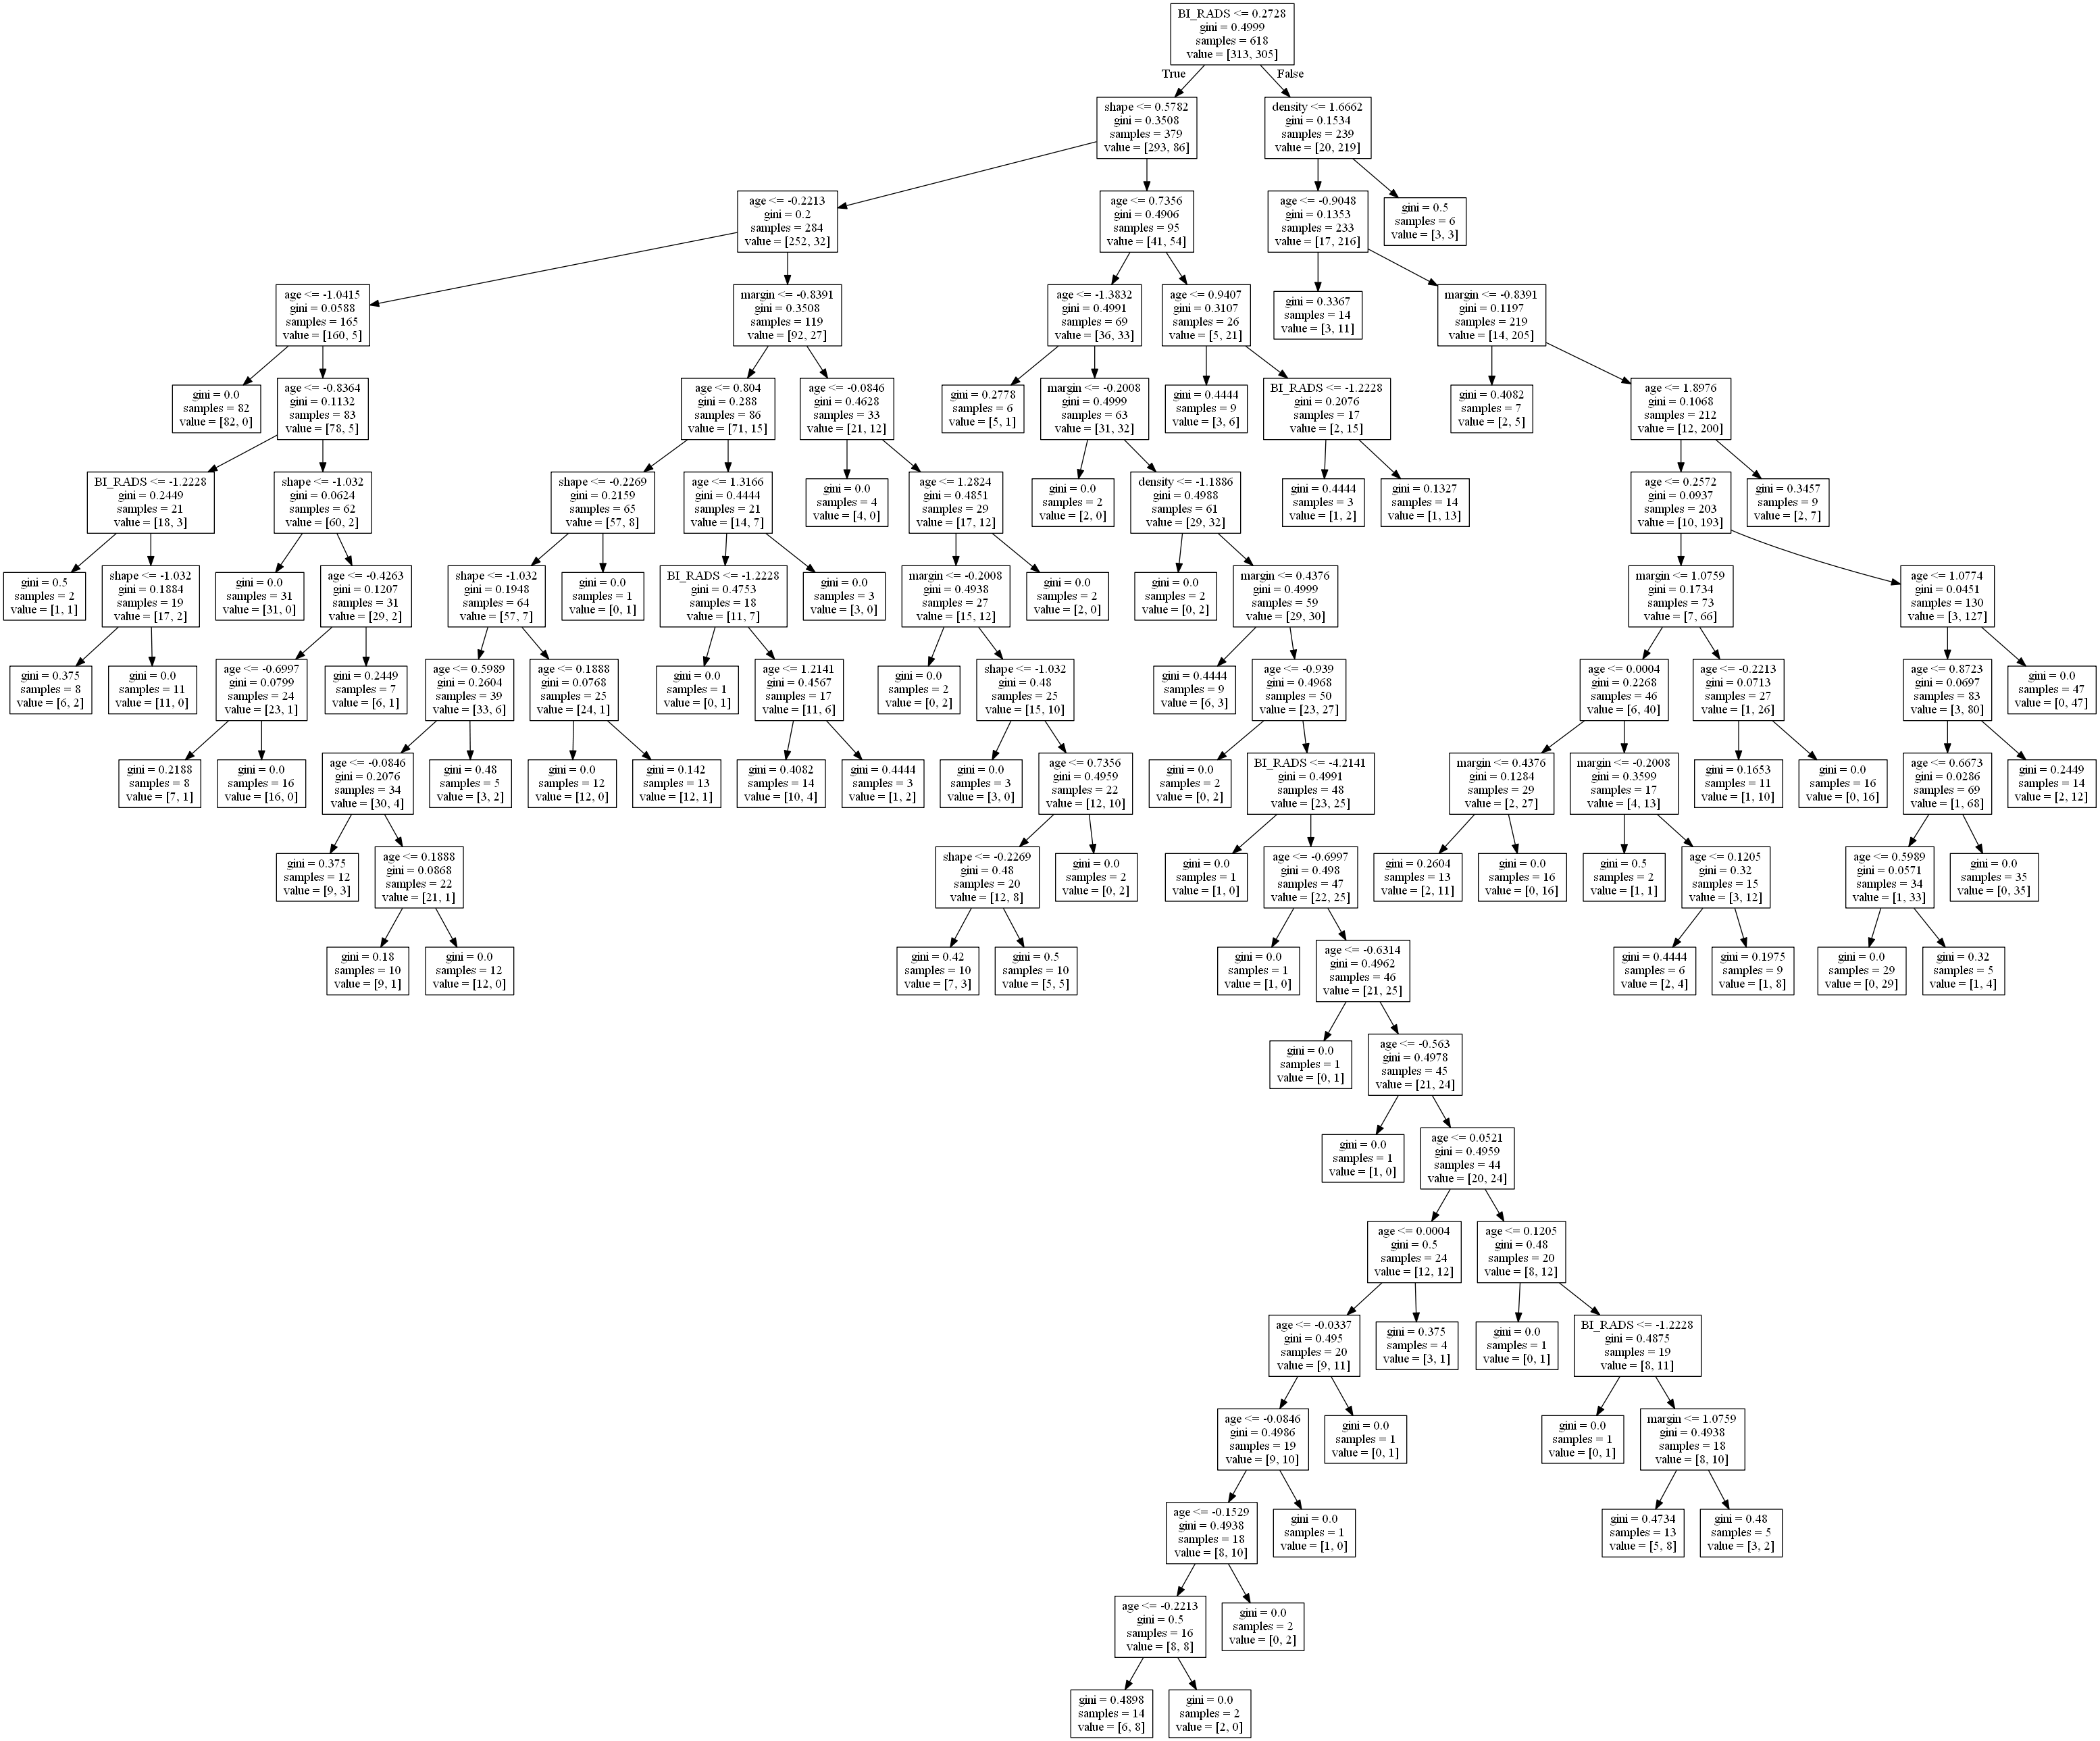

In [200]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn import tree
from pydotplus import graph_from_dot_data

feature_names = ['BI_RADS', 'age', 'shape', 'margin', 'density']

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_names)  
graph = graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [201]:
clf.score(features_test, labels_test)

0.8309178743961353

In [202]:
from sklearn.model_selection import cross_val_score

clf = tree.DecisionTreeClassifier(min_samples_split = 15)
scores = cross_val_score(clf, scaled_features, labels, cv=5)
print(scores)
print(scores.mean())

[0.76969697 0.85454545 0.81212121 0.8        0.76969697]
0.8012121212121212


In [203]:
scores = cross_val_score(clf, features, labels, cv = 5)
print(scores)
scores.mean()

[0.76969697 0.85454545 0.81212121 0.79393939 0.77575758]


0.8012121212121212

# Random Forest Tree

This is an ensemble method, which we hope to outperform decision tree as it constructs multitudes of decision trees based on random subset features and output the class that is the mode of the classification. More information can be found here http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [204]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, max_depth = 4, random_state=1)
cv_scores = cross_val_score(clf, scaled_features, labels, cv=5)

cv_scores.mean()

#n_estimators is the number of decision trees created. 
#You can read about other parameters in the above link

0.8436363636363635

0.84 ? Random forest isn't bad lets try another ensemble method
# AdaBoost
This is also an ensemble method, this method tries to create a strong classifer from a number of weak classifiers. It builds a model and creates a subsequent models that tries to correct the errors of previous models. More information can be found here http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [205]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=50,learning_rate=0.05, random_state=1)
cv_scores = cross_val_score(clf, scaled_features, labels, cv=5)

cv_scores.mean()

0.8387878787878789

So we see random forest is slightly better here. So lets try another classiffier entirely
# SVM
Here we will try it with the linear, rbf, poly and sigmoid kernel. More information can be found here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC 

In [206]:
from sklearn import svm

clf = svm.SVC(kernel='linear', C= 1.0)

cross_val_score(clf, scaled_features, labels, cv=5).mean()

0.8157575757575758

In [207]:
clf = svm.SVC(kernel='rbf', C= 1.0)

cross_val_score(clf, scaled_features, labels, cv=5).mean()


0.8278787878787879

In [208]:
clf = svm.SVC(kernel='sigmoid', C= 1.0)

cross_val_score(clf, scaled_features, labels, cv=5).mean()


0.7842424242424242

In [209]:
clf = svm.SVC(kernel='poly', C= 1.0)

cross_val_score(clf, scaled_features, labels, cv=5).mean()


0.8206060606060606

'rbf' is actually the best kernel for this data since it gave the best accuracy result while using Support Vector Machine(SVM) Support Vectr Classification (svc). Now lets try more simplier method of classification.
# KNN
This is K-nearest neighbor and we will check the accuracy for the first 50 neighbors to pick the best value of K

In [210]:
from sklearn.neighbors import KNeighborsClassifier
def Knn(value):
    for x in range(value):
        if x > 0:
            clf = KNeighborsClassifier(n_neighbors= x)
            print (x , cross_val_score(clf, scaled_features, labels, cv=5).mean())
Knn(51)


1 0.7466666666666666
2 0.7551515151515151
3 0.8024242424242424
4 0.8206060606060607
5 0.8193939393939393
6 0.8315151515151517
7 0.833939393939394
8 0.8254545454545456
9 0.8290909090909091
10 0.8242424242424242
11 0.8242424242424242
12 0.8157575757575758
13 0.8181818181818181
14 0.8193939393939393
15 0.8133333333333332
16 0.8181818181818181
17 0.806060606060606
18 0.8181818181818181
19 0.8181818181818181
20 0.823030303030303
21 0.816969696969697
22 0.8157575757575758
23 0.8193939393939396
24 0.8206060606060607
25 0.8218181818181819
26 0.8181818181818181
27 0.8193939393939393
28 0.8206060606060607
29 0.8193939393939396
30 0.8169696969696968
31 0.8193939393939396
32 0.8218181818181819
33 0.8206060606060606
34 0.8242424242424242
35 0.8218181818181819
36 0.8242424242424242
37 0.8218181818181819
38 0.8206060606060607
39 0.823030303030303
40 0.823030303030303
41 0.8218181818181819
42 0.8242424242424242
43 0.8193939393939393
44 0.8242424242424242
45 0.8242424242424242
46 0.8254545454545454
47 

We can clearly see when n_neighbors(k) = 7. We have the best accuracy. So lets try a more naive approach
# Naive Bayes 
First we have to normalize the data using MinMaxScaler since naive bayes do not support negative values we cannot use the StandardScaler. More information on naive bayes can be found here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [211]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
features_minmax = scaler.fit_transform(features)

clf = MultinomialNB()
cross_val_score(clf, features_minmax, labels, cv=5).mean()

0.7757575757575758

Naive best actually acted naive but not as bad as i hoped. So lets try the simple logistic regression. To see if it can do better
# Logistic Regression 

In [212]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
cross_val_score(clf, scaled_features, labels, cv=5).mean()

0.823030303030303

Wow! as simple as it sounds it did not perform bad at all. So now lets try this last model. Quite interesting one
# Neural Networks 
Here we are going to use Keras and sklearn which will in turn use a TensorFlow backend. You can get more information of Neural Networks and Keras here ------------

In [213]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.wrappers.scikit_learn import KerasClassifier

In [214]:
def create_model():
    model = Sequential()
 
    model.add(Dense(6, input_dim=5, kernel_initializer='normal', activation='relu'))

    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [215]:
# Wrap our Keras model in an estimator compatible with scikit_learn
estimator = KerasClassifier(build_fn=create_model, nb_epoch=100, verbose=2)
# Now we can use scikit_learn's cross_val_score to evaluate this model identically to the others
cv_scores = cross_val_score(estimator, scaled_features, labels, cv=5)
cv_scores.mean()

Epoch 1/1
 - 4s - loss: 0.6909 - acc: 0.7227
Epoch 1/1
 - 4s - loss: 0.6921 - acc: 0.4939
Epoch 1/1
 - 4s - loss: 0.6885 - acc: 0.6758
Epoch 1/1
 - 4s - loss: 0.6864 - acc: 0.7924
Epoch 1/1
 - 4s - loss: 0.6864 - acc: 0.8152


0.7636363639614798